#### 统计矩 — 偏度和峰度
有时，仅用均值和方差并不足以充分描述一个分布。在计算方差时，我们是对围绕均值的偏差取其平方。因此当偏差很大时，我们并不清楚它们是正偏差的还是负偏差。因此就诞生了分布的偏度和对称性的概念。如果均值两侧各部分互为镜像，则我们称分布是对称的。例如，正态分布就是一种对称分布。均值为$\mu$，标准差为$\sigma$的正态分布定义为：
$$ f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$
我们通过作图来证明它是对称的：

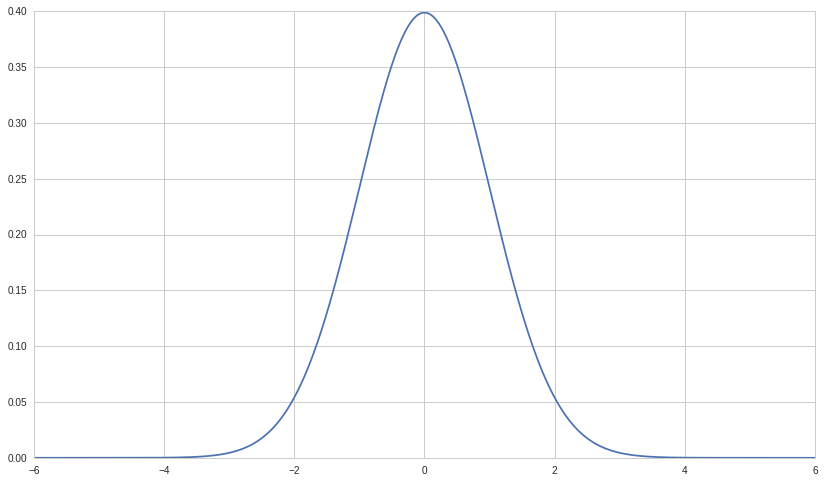

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# 绘制一个均值为0，标准差为2的正态分布
xs = np.linspace(-6,6, 300)
normal = stats.norm.pdf(xs)
plt.plot(xs, normal);

非对称性的分布被称为偏态（偏斜）的。例如，一个均值为0的分布，可能有许多小的正数和个别大的负数组成（负偏态），或者相反（正偏态）。对称分布的偏度为0。正偏态单峰分布（一个峰）具有均值 > 中位数 > 众数的特性；负偏态单峰分布恰恰相反，其具有均值 < 中位数 < 众数的特性。而在对称的单峰分布中这三个值是相等的。

偏度的确切计算公式为：
$$ S_K = \frac{n}{(n-1)(n-2)} \frac{\sum_{i=1}^n (X_i - \mu)^3}{\sigma^3} $$

公式中的$n$为观察值的个数，$\mu$是算数平均值，$\sigma$是标准差。它的正负号描述了如上所述的倾斜方向。我们可以绘制出正负偏态的分布，来看空它们是如何体现的。对于单峰分布来说，负偏态分布通常表明在左侧存在着厚尾，而正偏态下后尾则出现在右侧。

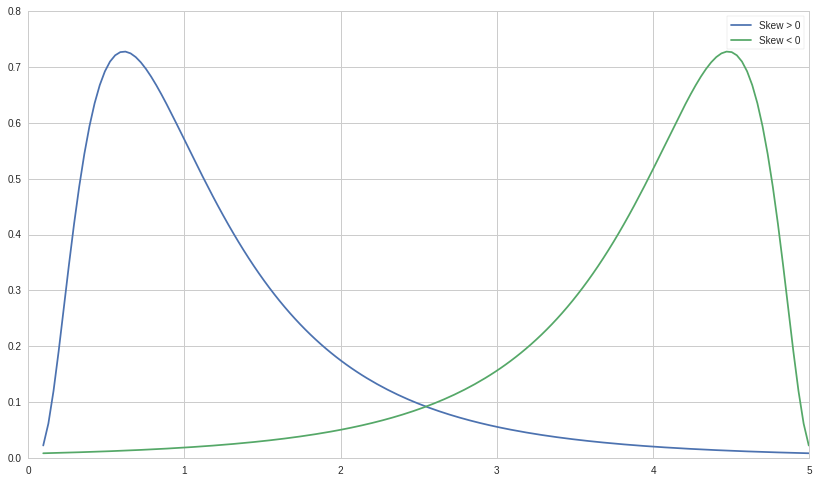

In [2]:
# 生成x值并绘制其分布
xs2 = np.linspace(stats.lognorm.ppf(0.01, .7, loc= -.1), stats.lognorm.ppf(0.99, .7, loc= -.1), 150)

lognormal = stats.lognorm.pdf(xs2, .7)
# 绘制正偏态分布
plt.plot(xs2, lognormal, label='Skew > 0')

# 绘制负偏态分布
plt.plot(xs2, lognormal[::-1], label='Skew < 0')
plt.legend();

有时在绘制离散数据集时，偏态并不明显，但我们仍然能够计算它。例如下面这个例子，计算2012-2014年标普500的收益率的偏度、均值和中位数。结果表明分布呈现负偏度，并且均值小于中位数。

偏度: -0.208327061229
均值: 0.000732549262327
中位数: 0.000805529770079


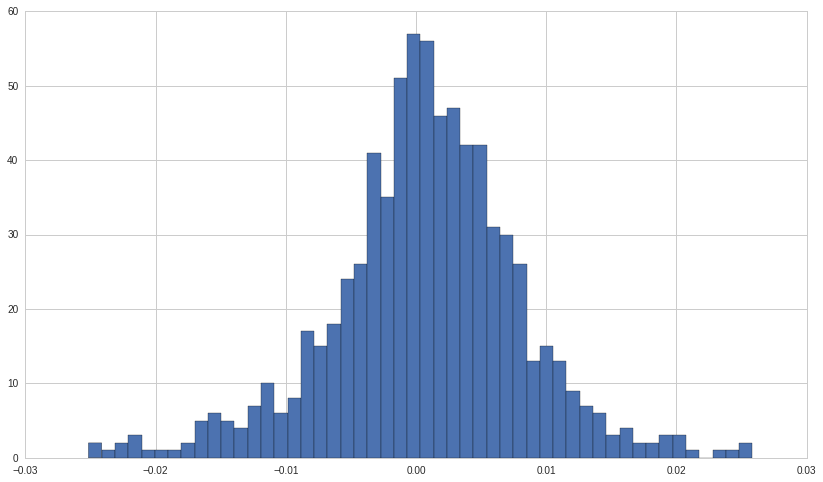

In [3]:
start = '2012-01-01'
end = '2015-01-01'
pricing = get_pricing('SPY', fields='price', start_date=start, end_date=end)
returns = pricing.pct_change()[1:]

#使用scipy.stats库的skew函数计算偏度
print '偏度:', stats.skew(returns)
#使用numpy库的mean函数计算均值
print '均值:', np.mean(returns)
#使用numpy库的median函数计算中位数
print '中位数:', np.median(returns)

plt.hist(returns, 50);

#### 峰度

A leptokurtic distribution has more frequent large jumps away from the mean than a normal distribution does while a platykurtic distribution has fewer.

峰度用来衡量偏离均值的分布形状，它描述了一个分布与正态分布相比，它的顶峰形状是怎样的。所有正态分布，无论均值和方差是多少，峰值都是3（称作常峰）。尖峰分布（峰度 > 3）峰高且尾厚，而扁峰分布（峰度 ＜ 3）则更宽。然而有时候会使用超出正态分布的过度峰度（峰度 - 3），例如`scipy`库就默认使用它来计算峰度。相比正态分布，尖峰分布在远离平均值的地方存在更多的极值，扁峰分布则正好相反。

尖峰分布的过度峰度: 3.0
常峰分布的过度峰度: 0.0
扁峰分布的过度峰度: -0.593762875598


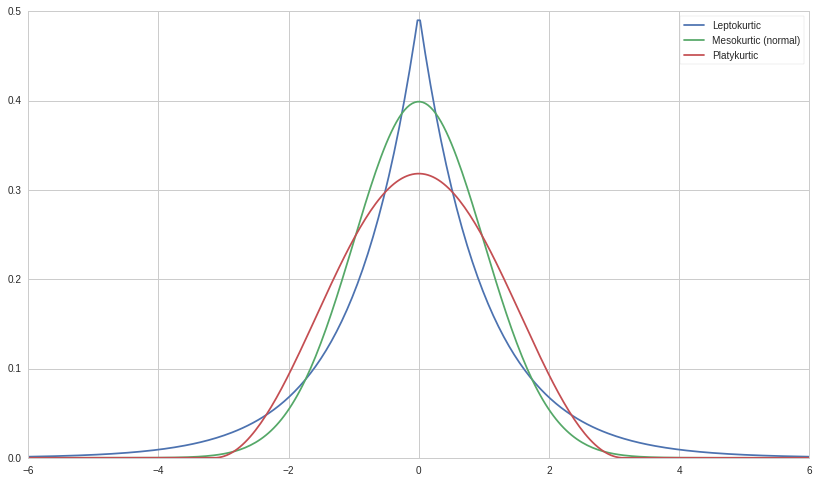

In [5]:
# 绘制尖峰、平峰、正态分布
plt.plot(xs,stats.laplace.pdf(xs), label='Leptokurtic')
print '尖峰分布的过度峰度:', (stats.laplace.stats(moments='k'))

plt.plot(xs, normal, label='Mesokurtic (normal)')
print '常峰分布的过度峰度:', (stats.norm.stats(moments='k'))

plt.plot(xs,stats.cosine.pdf(xs), label='Platykurtic')
print '扁峰分布的过度峰度:', (stats.cosine.stats(moments='k'))
plt.legend();

峰度的计算公式为：
$$ K = \left ( \frac{n(n+1)}{(n-1)(n-2)(n-3)} \frac{\sum_{i=1}^n (X_i - \mu)^4}{\sigma^4} \right ) $$

过度峰度的计算公式为：
$$ K_E = \left ( \frac{n(n+1)}{(n-1)(n-2)(n-3)} \frac{\sum_{i=1}^n (X_i - \mu)^4}{\sigma^4} \right ) - \frac{3(n-1)^2}{(n-2)(n-3)} $$

当样本数足够多时，过度峰度可近似为：
$$ K_E \approx \frac{1}{n} \frac{\sum_{i=1}^n (X_i - \mu)^4}{\sigma^4} - 3 $$

以上我们考虑的是在理想的连续分布情况下，计算峰度的公式。而对于一组服从正态分布的数据样本，我们将使用第一个峰度定义，此时的过度峰度近似为0。我们使用`scipy`库来计算前文标普500收益率的过度峰度：

In [7]:
print "收益率过度峰度: ", stats.kurtosis(returns)

收益率过度峰度:  1.21431979997


收益率直方图显示，在超出了距离均值3个标准差的范围外，存在显著大峰值的观测值，因此我们也就不奇怪于峰度计算显示其是尖峰分布了。

#### 其他的标准化矩

方差、偏度和峰度的表达式之所以相似并非纯属巧合。它们都是首要的也是最重要的标准矩，采用K次方的表达式：
$$ \frac{E[(X - E[X])^k]}{\sigma^k} $$
由于一次方的标准矩总是为0 $(E[X - E[X]] = E[X] - E[E[X]] = 0)$，因此我们更在意的是二次方至四次方的标准化矩（即方差、偏度、峰度）。所有的标准化矩都是通过无量纲的数值描述分布情况，特别是可以被用来量化一个分布离正态分布（拥有的4个标准化矩 $0, \sigma, 0, \sigma^2$）有多接近。

#### 使用Jarque-Bera（哈尔克-贝拉）进行正态性检验
哈尔克-贝拉检验是一种常见的统计检验，用于比较样本数据是否与正态分布拥有相似的偏度和峰度。我们将它应用在标普500收益率上，找到来自于正态分布的p值。

哈尔克-贝拉检验的零假设（null hypothesis，又作虚无假设）是假设数据基于正态分布。因此如果你得到的P值较低，该检验可能会将其误判为非正态分布。为了保险起见，可以在进行检验时增设自定义的阈值。

注意应将P值视为非是即否的“开关”，而不是过度解读或者比较P值的大小。这里我们将P值的阈值设为0.05。

#### 检验校准

不同的编程语言在语法书写上有所偏差，因此你可能不清楚“被检验的样本数据来自正态分布”是零假设还是替代假设。建议事先了解检验相关的程序说明文档，此外，通过模拟数据来确保检验能够给出正确的判断，以此来校准检验，也是一个好方法。让我们现在来用程序模拟一下：

In [4]:
from statsmodels.stats.stattools import jarque_bera

N = 1000
M = 1000

pvalues = np.ndarray((N))

for i in range(N):
    # 从正态分布中抽取M个样本值
    X = np.random.normal(0, 1, M);
    _, pvalue, _, _ = jarque_bera(X)
    pvalues[i] = pvalue
    
# 统计低于阈值0.05的P值个数
num_significant = len(pvalues[pvalues < 0.05])
print '显著性水平: ', float(num_significant) / N

显著性水平:  0.056


如果校准得当，我们应该预计在0.05显著性水平下有5％的情况下是错误的，而结果与其非常接近，这意味着检验按我们预期的那样是有效的。

In [5]:
_, pvalue, _, _ = jarque_bera(returns)

if pvalue > 0.05:
    print '收益率可能是正态的.'
else:
    print '收益率可能是非正态的'

收益率可能是非正态的


对标普500收益率应用检验的结果告诉我们，其可能并不服从正态分布。